# FIT5202: Assessment 2 : Sentiment Classification for Product Reviews
### Group Members
Monica | 29828775 <br>
Mukul Gupta | 29873150 <br>
Rachana Jobanputra | 29555248 <br>
#### Date: 31/10/2019

Version: 2.3.1

#### Environment: Python 3.6 and Jupyter notebook

#### Datasets : Yelp Reviews
labeled_data.csv (50k records)<br>
unlabeled_data.csv (600k records)<br>
test_data.csv (50k records)<br>

Run the following block of code when using google colab. Note: Change the path according to the drive

In [ ]:
# #connecting to google drive
# from google.colab import drive
# import sys
# import os
# #Mount your Google drive to the VM
# drive.mount('/content/gdrive')
# sys.path.append('/content/gdrive/My Drive/')
# os.chdir("/content/gdrive/My Drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Multi-label text classification using ULMFiT and FastAI Library in Python
# ULMFiT - Universal Language Model Fine Tuning

This method is one of the latest developments in the field of text classification in the hope that we can classify text much better. This concept focuses on understanding language rather than just text or words. ULMFiT makes use of transfer learning to create a Language Model. 


ULMFiT proposed by Jeremy Howard and NUI Galway Insight Center’s Sebastian Ruder, is capable of predicticting next word in the sentence  based on unsupervised learning of the WikiText 103 corpus. It uses multiple LSTM layers, with dropout applied to every layer which the secret behind this method. This was developed by Steve Merity (Salesforce) as the AWD-LSTM architecture. 

Main Reference -> https://medium.com/technonerds/using-fastais-ulmfit-to-make-a-state-of-the-art-multi-label-text-classifier-bf54e2943e83
<br>
Document for FastAI -> 
https://docs.fast.ai/text.data.html#TextLMDataBunch

In [ ]:
from fastai.text import *
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# Optional: use this line if you want to remove Pandas'
# default concatenation of long text in columns
pd.set_option('display.max_colwidth', -1)

__from sklearn.feature_selection import chi2:__
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Chi square test tells you that which features are better related with the outcome variable. Smaller p value means more closely related with the outcome.

Reference -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

## Loading the dataset in python and Spliting the dataset into Training and Validation Datasets:

In [ ]:
data = pd.read_csv('labeled_data.csv')
data = data[['label','text']]
data.head()

label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text
0  4      The new rule is - \r\nif you are waiting for a table (which you almost always are) , you cant wait inside. \r\nThey just posted a sign upfront that it causes some concerns for the seated patrons. \r\nHow awful is that? \r\n\r\nI like that they included the apology along with "especially now in the cold". \r\n\r\np.s you can try calling in ahead to reserve a table but thats ONLY if the waiting list is short. Otherwise, you have to show up to reserve. Boourns. \r\n\r\n\r\nThis place could do no wrong in my eyes. Rattle away you equally-clever/witty-name-for a hot beverage.\r\n\r\nMust mention - I am obsessed with Mad Gab. \r\n\r\nxoxo\r\nM.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1  3      Flirted with giving this two stars, but that's a pretty damning rating for what might have just been an off night...\r\n\r\nNew to the East side, and so we don't know many of these hidden gems, but me and the fiance met her friend for drinks here and ended up getting some things to nibble. \r\n\r\nFirst off, service was pretty slow, which was unusual because the restaurant is pretty small and galley style. You would think it would be easy for servers to routinely hit up tables as you pass by. \r\n\r\nThe fiance ordered the Quinoa Salad, and said it was pretty good, but dry. I wasn't too hungry and so I simply ordered the Bruchetta 3-way which came with burnt crostinis. And I ordered a side of fries, which were either hard or chewy.\r\n\r\nThe friend ordered the macaroni & cheese, and added chicken and bacon (her usual order) and liked it.  \r\n\r\nCan't remember the last time I thought to myself- "Huh... they failed at fries..." So, like I said- two stars. But, the decor was good, it was a good place to have a conversation, and I might be back to try more expensive fare, but-... ah... the fry thing... yeeesh... I dunno, man...
2  5      I was staying at planet Hollywood across the street and saw good reviews on this place so my husband and I decided to give it a try. We love a good breakfast sandwich. We both ordered the bacon egg and cheese, cold brew, a biscuit and a salted caramel cookie. Everything tasted amazing! The egg is medium so it pops when you take a bite so be prepared for that. The cookie was absolutely delicious and the biscuit was soft and fluffy. We got there are around 10:30am and there was a line already. Luckily the line moves very qui

In [ ]:
data = data.dropna()
data = data.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(data, stratify = data['label'], test_size = 0.1, random_state = 5)
df_trn.shape, df_val.shape

((45000, 2), (5000, 2))

## Preparing/Preprocessing the Data:

Next, we will setup our data in the format that FastAI requires it to be in. FastAI provides simple functions to create Language Model and Classification "data bunch".<br><br>
Creating a data bunch automatically results in pre-processing of text, including vocabulary formation and tokenization. 
<br><br>
__TextLMDataBunch:__ creates a data bunch for language modelling. In this, labels are completely ignored. Instead, data is processed so that the RNN can learn what word comes next given a starting word. All the texts in the datasets are concatenated and the labels are ignored. Instead, the target is the next word in the sentence.

__TextClasDataBunch:__ sets up the data for classification. Labels play a key role here. We can also set the batch size for learning by changing the bs parameter. 


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

__bs=32:__ is batch_size parameter. Usually, text databases are huge, so we need to feed these text into a GPU using batches, batch size 32 means that we will feed 32 texts at once to update parameters of our deep learning model. On running out of memory because of smaller GPU RAM, you can reduce batch size to 16. Here we have used Google Colab to execute our model hence bs=32. Also, training with large mini batches such as 128 or 256 might be bad.<br><br>
Reference -> https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e<br>
<br>
It is recommended to use smaller batch sizes if the GPU is not that large. Also, using larger batch sizes leads to lower train loss, but the test loss is comparatively larger. The test loss decreases if we decrease the batch size which is exactly what we want.<br> 
Research Paper -> https://arxiv.org/pdf/1803.09820.pdf

In [ ]:
data_clas.show_batch()

xx___ tags represent the aspects of language in a way that the computer can understand. <br><br>
__xxbos:__ marks the beginning of a sentence. <br>
__xxmaj:__ used to imply that the first letter of the next word is capitalized.<br>
__xxfld:__ represent separate parts of a document like title, summary etc., each one will get a separate field and so they will get numbered (e.g. xxfld 1, xxfld 2).<br>
__xup:__ if there's something in all caps, it gets lower cased and a token called xxup will get added to it. Words that are fully capitalized, such as “I AM SHOUTING”, are tokenized as “xxup i xxup am xxup shouting“.<br>
__xxunk:__ token used instead of an uncommon word.<br>
__xxrep:__ token indicates repeated word, if you have 29 ! in a row, (i.e. xxrep 29 !).<br><br>
Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d


## Creating the Language Model:

In [ ]:
# creating a language model with AWD-LSTM architecture mentioned above
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

__language_model_learner:__ creates a fast AI, language learner model.<br>
__data_lm:__ is the language model databunch created above.<br>
__AWD_LSTM:__ is the model architecture we are using here.<br>
__drop_mult:__ is the dropout. It is a hyper-parameter, used for regularization, sets the amount of dropout. If the model is over-fitting increase it, if under-fitting, you can decrease the number.
<br><br>

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.
<br>
Reference -> https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


In [ ]:
# !pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl

## Finding the Optimal Learning Rate to Train the Language Model:

__lr_find():__ Learning rate hyper-parameter is one of the most important parameters to train a model. Fast.ai provides a convenient utility (learn.lr_find) to search through a range of learning rates to find the optimum one for our dataset. Learning rate finder will increase the learning rate after each mini-batch. Eventually, the learning rate is too high that loss will get worse. <br>
Here, in the plot of Loss v/s Learning Rate, we first look at the lowest point and then going back one magnitude and choosing that as our learning rate. <br>
__learn.recorder.min_grad_lr:__ Here, this function, finds the optimum learning rate for us which is depicted by a red dot.
<br><br>
Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 1.74E-02


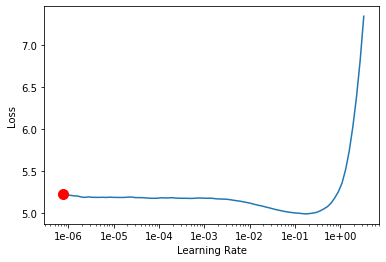

In [ ]:
# finding the optimum learning rate
learn.lr_find()

# suggesting/capturing the optimum learning rate by plotting
learn.recorder.plot(suggestion=True)

# calculating the minimum gradient
min_grad_lr = learn.recorder.min_grad_lr

## Training the model with the Optimal Learning Rate:

__fit_one_cycle():__ Here we feed in the optimal learning rate to train our language model. First argument '2' is number of epoch runs.<br>
It trained last layers and basically left most of the model exactly as it was. But what we really want is to train the whole model. Normally after we fine-tune the last layers, the next thing we do is we go __unfreeze__ (unfreeze the whole model for training) and the again train the whole neural network.<br><br>

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

In [ ]:
# training the last few layers of the model
learn.fit_one_cycle(2, min_grad_lr)

In [ ]:
# unfreezing the whole model
learn.unfreeze()

# training the rest of the neural network
learn.fit_one_cycle(2, 1e-3)

Our language model only achieved around 30% accuracy. This accuracy represents how well the model does at predicting the next word, given one word.<br>

Accuracy = 0.3 means the model is guessing the next word of the movie review correctly about a third of the time. That sounds like a pretty high number. So it’s a good sign that our language model is doing pretty well.<br>

Hence, after fine-tuning we get a model that is good at understanding the reviews and we can fine-tune that with transfer learning to multi classify reviews. Finally, we save the language model encoder so that we can load it later in our classifier:

In [ ]:
# saving the language model encoder
learn.save_encoder('ft_enc')

## Using the Language Model to train the Classifier:

__text_classifier_learner:__ built in fastai function used for training the text classifier. The first parameter is the __data_clas Databunch__. The second parameter is the __AWD_LSTM__ model architecture. For the third parameter drop_mult we have used 0.5. We have increased the dropout from 0.3 to 0.5 to prevent overfitting.

In [ ]:
# training the text classifier using data_clas DataBunch we created earlier 
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# loading the model language encoder which we have saved earlier
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (45000 items)
x: TextList
xxbos xxmaj the pie was amazing . xxmaj do n't have anything bad to say about the pie . xxmaj my friend got fries and they were also good . xxmaj the 2 bad thing was they were running out of pies and the pie was a little smaller than i thought it would be . xxmaj but the pies are definitely worth trying,xxbos xxmaj food was alright , but way too expensive , and inexplicably late arriving as were the drinks ... xxmaj on a slow night . xxmaj what my real issue is here is the pushy and pompous waiter we had . xxmaj some hipster with a superiority complex and an attitude , ( younger fella with longer hair ) . xxmaj super pushy to the point you think they get paid commission . xxmaj ordered overpriced fries with their " chorizo gravy " which i 'm pretty sure was xxmaj hormel chili out the can ... xxmaj tasted that way anyway . xxmaj price point here is outrageous given their awful service and lackluster quality .

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 2.09E-02


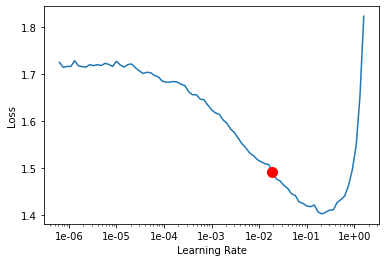

In [ ]:
# again finding the optimal learning rate
learn.lr_find()

# ploting the optimal learning rate
learn.recorder.plot(suggestion=True)

# again calculating the minimum gradient
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
# again training our language model by feeding in the optimal learning rate with 2 epochs
learn.fit_one_cycle(2, min_grad_lr)

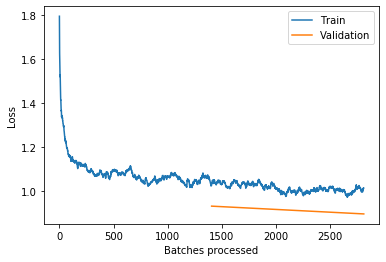

In [ ]:
# tracking the loss functions over the epochs
learn.recorder.plot_losses()

__fit_one_cycle():__  It is one cycle of learning rate. When we call fit_one_cycle, we are actually passing in a maximum learning rate. On getting close to the final answer it is needed to anneal the learning rate to hone in on it. The motivation behind this is that during the middle of learning when learning rate is higher, the learning rate works as regularization method and keep network from over-fitting. This helps the network to avoid steep areas of loss and land better flatter minima.<br><br>

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

__Discriminative Leraing Rates | slice():__ These are the techniques fast.ai uses underneath for such impressive results, applying different learning rate to layers as we go from layer to layer. When fitting a model you can pass a list of learning rates which will apply a different rate to each layer group. On passing slice(start,end) then the first group's learning rate is start, the last is end, and the remaining are evenly spaced.<br>
The bottom of the slice and the top of the slice is the difference between how quickly the lowest layer of the model learns versus the highest layer of the model learns. As you go from layer to layer, we decrease the learning rate. The lowest levels are given smaller learning rates so as not to disturb the weights much.<br><br>

Reference -> https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

__Momentum:__ The argument(moms=(0.8,0.7)), momentums equals 0.8,0.7. Basically for training recurrent neural networks (RNNs), it really helps to decrease the momentum a little bit. Every time our learning rate is small, our momentum is high, as we are learning small learning rate, but we keep going in the same direction, we may as well go faster (higher momentum). But as we are learning at a high learning rate, but we keep going in the same direction, we might overshoot the target, so momentum should be slowed. This trick can help anyone train 10 times faster.

__freeze_to:__ Not unfreezing the whole thing but to unfreeze one layer at a time. Hence, unfreezing the last two layers __freeze_to(-2)__, training it a little bit more and then unfreeze the whole thing __unfreeze()__, train it a little bit more. This approach works very well and gives incredible results.

In [ ]:
# gradual unfreezing
# start by training the last few layers, then go backwards and unfreeze and train layers before.
# here, we unfreeze the last 2 layers
learn.freeze_to(-2)

# training the language model
learn.fit_one_cycle(3, slice(5e-3, 2e-3), moms=(0.8,0.7))

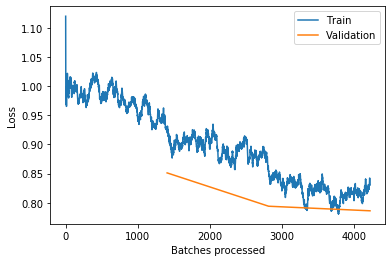

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

## Analyzing the Results:

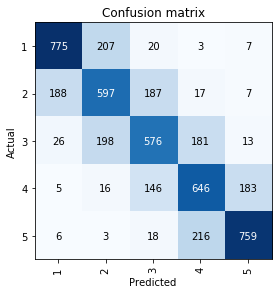

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

The diagonal represent correct predictions and the bright blue represents that these boxes have a high value compared to the rest of the boxes. This means that our classifier was able to correctly classify most of the test set correctly.

In [ ]:
# finding the categories that the classifier gets confused on the most
interp.most_confused()

[(5, 4, 216),
 (1, 2, 207),
 (3, 2, 198),
 (2, 1, 188),
 (2, 3, 187),
 (4, 5, 183),
 (3, 4, 181),
 (4, 3, 146),
 (3, 1, 26),
 (1, 3, 20),
 (5, 3, 18),
 (2, 4, 17),
 (4, 2, 16),
 (3, 5, 13),
 (1, 5, 7),
 (2, 5, 7),
 (5, 1, 6),
 (4, 1, 5),
 (1, 4, 3),
 (5, 2, 3)]

# F score

In [ ]:
f1_score(interp.pred_class, interp.y_true, average="macro")

0.6707022008291188

# Recall

In [ ]:
recall_score(interp.pred_class, interp.y_true, average="macro")

0.6717906298020541

# Precision

In [ ]:
precision_score(interp.pred_class, interp.y_true, average="macro")

0.6701528271316899

# Accuracy

In [ ]:
accuracy_score(interp.pred_class, interp.y_true)

0.6706

## Predicting the labels of the Test Data:

In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

test_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text
0  test_1  trying to have a nice quiet dinner.  the announcer for the awards giveaways is way too loud in the restaurant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1  test_2  Been getting food to go from here for over 3yrs. My wife usually tend to get the same items. Why fix something when it works.\r\n\r\nShe always gets the Mongolian Beef lunch special, or dinner. Every once in a while we indulge in the Crab Rangoon. I tend to alternate between the Singapore Noodle, Chicken Fried Rice and the Chow Mai Fun.\r\n\r\nIt's not the best Chinese food I've had, but I never had a complaint regarding the quality and quantity of my food. I've never had to wait longer then 10 mins to pick up my food as well.\r\n\r\nThey recently raised the price on their lunch specials by $0.50, but it is still a killer deal at $5.49.\r\n\r\nGood food, good prices.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# predicting the test data
test_data['label'] = test_data['text'].map(lambda x : learn.predict(x)[0])

In [ ]:
test_data_new = test_data[["test_id", "label"]]

# Exporting predicted data

In [ ]:
test_data_new.to_csv('predict_label.csv', encoding='utf-8', index=False)